0. Определяем в какой среде проект: локально или Google Colab

In [2]:
### === MNIST CLASSIFICATION ===
import os
import sys

# Google Colab? Проверяем по пути
if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

# Путь к проекту в Google Drive
    project_path = "/content/drive/MyDrive/MyPyTorch/notebooks/"
    %cd $project_path
    sys.path.append(".")
else:
    project_path = os.path.abspath(".")
    sys.path.append(project_path)

# Присваиваем имя блокноту
NOTEBOOK_NAME = "02_mnist_classification"

Mounted at /content/drive
/content/drive/MyDrive/MyPyTorch/notebooks


1. Импорт модулей

In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import torch
import torch.nn as nn
import torch.optim as optim

from model import MnistMLP
from data_utils import get_mnist_loaders
from train import train_model

ImportError: cannot import name 'MnistMLP' from 'model' (/content/drive/MyDrive/MyPyTorch/model.py)

2. Настройка устройства

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


3. Получение данных

In [ ]:
train_loader, val_loader = get_mnist_loaders(batch_size=64)

4. Создание модели, функции потерь и оптимизатора

In [ ]:
model = MnistMLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

5. Обучение модели

In [ ]:
train_model(
    model=model,
    dataloader=train_loader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    device=device,
    epochs=15
)

Epoch 01 | Loss: 17.0651 | Accuracy:  0.9941
Epoch 02 | Loss: 15.0651 | Accuracy:  0.9947
Epoch 03 | Loss: 12.7242 | Accuracy:  0.9954
Epoch 04 | Loss: 11.3068 | Accuracy:  0.9958
Epoch 05 | Loss: 10.1893 | Accuracy:  0.9962
Epoch 06 | Loss: 13.6701 | Accuracy:  0.9948
Epoch 07 | Loss: 8.5401 | Accuracy:  0.9970
Epoch 08 | Loss: 6.8291 | Accuracy:  0.9976
Epoch 09 | Loss: 9.2274 | Accuracy:  0.9967
Epoch 10 | Loss: 8.3743 | Accuracy:  0.9972
Epoch 11 | Loss: 7.6990 | Accuracy:  0.9972
Epoch 12 | Loss: 6.7906 | Accuracy:  0.9976
Epoch 13 | Loss: 8.6700 | Accuracy:  0.9971
Epoch 14 | Loss: 5.6542 | Accuracy:  0.9982
Epoch 15 | Loss: 6.7127 | Accuracy:  0.9977


6. Сохранение весов

In [ ]:
# Имя для весов, аналогичное имени блокнота
filename = f"{NOTEBOOK_NAME}.pt"
os.makedirs("checkpoints", exist_ok=True)
save_path = os.path.join("checkpoints", filename)
torch.save(model.state_dict(), save_path)
print("Model saved to ", save_path)

Model saved to  checkpoints\02_mnist_classification.pt


7. Оценка качества модели (Тестирование)

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        predicted = pred.argmax(1)
        correct += (predicted == yb).sum().item()
        total += yb.size(0)
acc = correct / total
print(f'Validation accuracy: {acc:.4f}')

Validation accuracy: 0.9763


8. Визуализация предсказаний

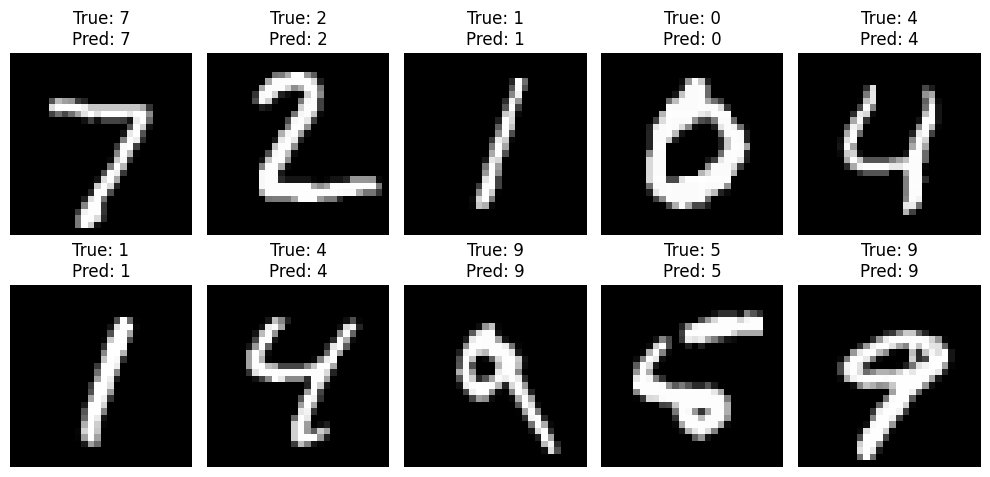

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(iter(val_loader))
outputs = model(images.to(device))
predicted = outputs.argmax(1).cpu()

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i][0], cmap="gray")
    plt.title(f"True: {labels[i]}\nPred: {predicted[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()